# Natural Language Processing


Natural Language Processing basically consists of combining machine learning techniques with text, and using math and statistics
to get that text in a format that the machine learning algorithms can understand!

Requirements:
   
    need to have NLTK installled
    # !conda install nltk #This installs nltk
    # import nltk # Imports the library
    # nltk.download() #Download the necessary datasets
    

# Part 1: Data

The data set we will be using is from https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection, which is downloaded and placed in the same directory as notebook.

The data file contains a collection of SMS phone messages.

rstrip() to get a list of all the lines of text messages.

In [1]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [2]:
print len(messages)

5574


In [3]:
# Let's print the first 10 messages and number them using enumerate:

for num, message in enumerate(messages[:10]):
    print num,message
    print '\n'

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

We can see 'the tab separated values' in the file, where 1st column is 'label' saying ham or spam, 2nd column is message itself.

The numbers are not part of the file, comes from enumerate.

In [4]:
# Next we create a dataframe from the TSV file.
import pandas
messages = pandas.read_csv('SMSSpamCollection',
                          sep='\t',names=['labels','message'])

In [5]:
# check the head of dataframe
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# check basic stats
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [8]:
messages.groupby('labels').describe()

message
labels                                                          
ham    count                                                4825
       unique                                               4516
       top                                Sorry, I'll call later
       freq                                                   30
spam   count                                                 747
       unique                                                653
       top     Please call our customer service representativ...
       freq                                                    4

In [9]:
# Let's add a new column 'length' to the dataframe

messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Part 2: Basic Explorary Data Analysis

In [10]:
# Visualize this: import the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

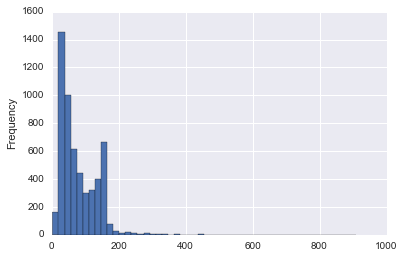

In [11]:
messages['length'].plot(bins=50,kind='hist')

In [12]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

max is 910, which is really long message. Let's look at the message.

In [13]:
messages[messages['length'] == 910]['message'].iloc[0] 

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07DDBC10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x07F77ED0>], dtype=object)

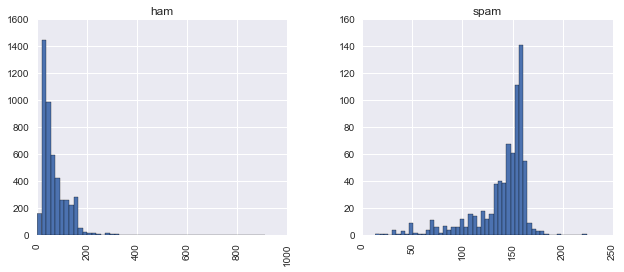

In [14]:
# let's check is the message length is a distinguishing feature between ham and spam.

messages.hist(column='length',by='labels',bins=50,figsize=(10,4))
# This will allow to plot 2 histograms, separated by ham and spam.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0816C7F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x08435610>], dtype=object)

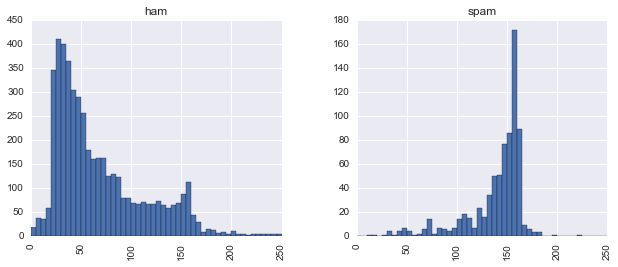

In [15]:
messages.hist(column='length',by='labels',bins=50, range = [0,250], figsize=(10,4))

# Part 3: Text Pre-processing:

Our main issue with our data is that it is all in text format (strings). The classification algorithms will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus(a group of text) to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

We'll begin by;

In this section we'll massage the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will use NLTK library. 

Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

First removing punctuatio; we can use Python's built-in string library to get a quick list of all the possible punctuation:

In [16]:
import string
# Our main goal is to create a function that will process the string in the message columns.

In [17]:
mess = 'Sample message! Notice: it has punctuation'
# first thing is try to get rid of the punctuation

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
nopunc = [char for char in mess if char not in string.punctuation]

In [20]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [21]:
nopunc = ''.join(nopunc)

In [22]:
nopunc

'Sample message Notice it has punctuation'

In [23]:
# we are able to remove punctuation.
# next we try to remove stop words.
from nltk.corpus import stopwords

In [24]:
# check what are the stop words:
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [25]:
# stop words are really common words, will not give much information in terms of classifying spam and ham, so we want to remove.
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [26]:
# remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

we got rid of 2 stop words 'it' and 'has'

In [28]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [29]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# Tokenize these messages; process of converting the normal text strings in to a list of tokens(words).
# check in the first 5 messages
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [31]:
# We have not actually changed the dataframe.
messages.head(5)

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Part 4: Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas). Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

For example:

<table border = “1“>

Message 1 Message 2 ... Message N </tr>

Word 1 Count01...0 </tr>

Word 2 Count00...0 </tr>

... 12...0 </tr>

Word N Count 01...1 </tr> </table>

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
# we will only pass analyzer argument to be our previously defined function.

In [49]:
# bow stands for bag of words
bow_transformer = CountVectorizer(analyzer=text_process)

In [50]:
bow_transformer.fit(messages['message'])

C:\Users\Punam\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CountVectorizer(analyzer=<function text_process at 0x094EE6B0>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [35]:
message4 = messages['message'][3]

In [51]:
print message4

U dun say so early hor... U c already then say...


In [52]:
bow4 = bow_transformer.transform([message4])

In [54]:
print bow4

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [55]:
print bow4.shape

(1, 11425)


This means that there are 7 unique words in message 4(after removing common stop words), 2 of them appear twice.
Let's check which one appear twice.

In [56]:
print bow_transformer.get_feature_names()[4068]
print bow_transformer.get_feature_names()[9554]

U
say


Next we can use .transform on our Bag-of-words(bow) transformed object ans transform the entire DataFrame of messages. 
We will check out how the bow counts the entire SMS corpus is a large, sparse matrix:

In [57]:
messages_bow = bow_transformer.transform(messages['message'])

C:\Users\Punam\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [58]:
print 'Shape of Sparse Matrix: ', messages_bow.shape
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


After counting, the term weighing and normatization can be done using TF-IDF, using scikit-learn's TfidsTransformer. 

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [63]:
# let's check on message 4
tfidf4 = tfidf_transformer.transform(bow4)

In [64]:
print tfidf4

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [69]:
# check inverse document frequency(IDF) of word "u:
print tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]
# check IDF of word 'university':
print tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

3.28005242674
8.5270764989


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [70]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [71]:
print messages_tfidf.shape

(5572, 11425)


# Part 5: Training a Model

With all the messages rpresented as vectors, we can finally train our spam/ham classifier. 
For classifying documents by their text contents, Naive Bayes classifier is a good choice.

In [73]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [77]:
# check on classifying a single random message;
print 'Predicted:',spam_detect_model.predict(tfidf4)[0]
print 'Expected:', messages['labels'][3]

 Predicted: ham
Expected: ham


In [78]:
# check how well the model do over the entire data set:
all_predictions = spam_detect_model.predict(messages_tfidf)
print all_predictions

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


We built a model for spam vs ham classification, next we want to check how well our model will perform.

# Part 6: Model Evaluation

Classification accuracy alone is typically not enough information to make this decision. We can use Precision and Recall performance measures to evaluate our model for this classification problem.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

F1 Score:
The harmonic mean of precision and recall. F1 score is an 'average' of both precision and recall. We use the harmonic mean because it is the appropriate way to average ratios (while arthmetric mean is appropriate when it conceptually makes sense to add things up).

F1=2 * (Precision ∗ Recall) / (Precision + Recall)


In [79]:
from sklearn.metrics import classification_report
print classification_report(messages['labels'], all_predictions)

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



The above "evaluation",we evaluated accuracy on the same data we used for training. 

Such evaluation tells us nothing about the true predictive power of our model. 
If we simply remembered each example during training, the accuracy on training data would trivially be 100%, 
even though we wouldn't be able to classify any new messages.

Next, we will split the data into a training/test set, where the model only ever sees the training data during its model fitting 
and parameter tuning. The test data is never used in any way. This is then our final evaluation on test data is representative 
of true predictive performance.

In [80]:
from sklearn.cross_validation import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['labels'], test_size = 0.2)

In [81]:
print len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

4457 1115 5572


The test size is 20% of the entire dataset. The default split is 30/70.

# Part 7: Creating  Data Pipeline

Next, we will use Scikit Learn's pipeline to store a pipeline of workflow

Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing 
the data, for example feature selection, normalization and classification. 

 

In [82]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
        
    ])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! 

In [83]:
pipeline.fit(msg_train, label_train)

C:\Users\Punam\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x094EE6B0>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [84]:
predictions = pipeline.predict(msg_test)

C:\Users\Punam\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [87]:
print classification_report(predictions,label_test)

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1011
       spam       0.74      1.00      0.85       104

avg / total       0.98      0.97      0.97      1115



Now we have a classification report for our model on a true testing set!

